In [ ]:
!pip3 install scikit-multilearn
#!pip3 uninstall scikit-learn
!pip3 install scikit-learn==0.20.0

In [1]:
import os

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from functools import reduce

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn import utils, preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn import model_selection
from sklearn.model_selection import train_test_split, RandomizedSearchCV

from sklearn.linear_model import RidgeClassifier, Ridge
from sklearn.multioutput import MultiOutputClassifier, MultiOutputRegressor

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import AdaBoostRegressor, AdaBoostClassifier

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.svm import SVC, SVR

from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
#from skmultilearn.adapt import MLkNN
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import RidgeClassifier
#from sklearn.linear_model import RidgeRegressor
from sklearn.ensemble import GradientBoostingRegressor
# Compare Algorithms

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import statsmodels.api as sm

print(os.listdir("../input"))

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' #Hide messy TensorFlow warnings
#warnings.filterwarnings("ignore") #Hide messy Numpy warnings
#warnings.filterwarnings('ignore', category=DeprecationWarning)


seed = 21

['SGH.csv', 'PPv3.csv']


In [8]:
def getAccuracy(prediction, actual):
    matched = []
    for (p,a) in zip(prediction, actual):
        matched.append(len(set(p.astype(int)) & set(a)))
    return matched

def getPercent(prediction, actual, n):
    matched = []
    for (p,a) in zip(prediction, actual):
        matched.append(set(p.astype(int)) & set(a))
    return sum(len(num) > n for num in matched)/len(matched)*100.00

def getCounts(prediction, actual):
    matched = []
    N = [0,0,0,0,0,0,0,0]
    if len(prediction) == 0: return N
    for (a,p) in zip(actual, prediction):
        matched.append(set(p.astype(int)) & set(a))
    if len(matched) == 0:
        return N
    N[0] = sum(len(num) > 0 for num in matched)/len(matched)*100.00
    N[1] = sum(len(num) > 1 for num in matched)/len(matched)*100.00
    N[2] = sum(len(num) > 2 for num in matched)/len(matched)*100.00
    N[3] = sum(len(num) > 3 for num in matched)/len(matched)*100.00
    N[4] = sum(len(num) > 4 for num in matched)/len(matched)*100.00
    N[5] = sum(len(num) > 5 for num in matched)/len(matched)*100.00
    N[6] = sum(len(num) > 6 for num in matched)/len(matched)*100.00
    N[7] = sum(len(num) > 7 for num in matched)/len(matched)*100.00
#    matched.extend(N)
    return N


def getAccuracy1dCount(prediction, actual):
    iMatched = 0
    print(len(prediction))
    for i in range(0,len(prediction)):
        if prediction[i] == actual[i]:
            iMatched = iMatched +1
    return iMatched

def getAccuracy1dPercentCorrect(prediction, actual):
    iMatched = 0
    print(len(prediction))
    for i in range(0,len(prediction)):
        if prediction[i] == actual[i]:
            iMatched = iMatched +1
    return iMatched/len(prediction) * 100.0


def getAccuracyCount(prediction, actual):
    matched = []
    if len(prediction) == 0: return 0
    for (p,a) in zip(prediction, actual):
#        print ( "p: ", p, " a: ", a, (set(p.astype(int)) & set(a)) )
        matched.append((set(p.astype(int)) & set(a)))
    return sum(len(num) > 0 for num in matched)/len(matched)*100.00

def getIntersection(p1, p2):
    return [reduce(np.intersect1d, (p.astype(int), a.astype(int))) for (p,a) in zip(p1, p2)]

def getUnion(p1, p2):
    if len(p1) == 0: return p2
    return [reduce(np.union1d, (p.astype(int), a.astype(int))) for (p,a) in zip(p1, p2)]

def getUnion1dArray(p1,p2):
    return reduce(np.union1d, (p1,p2))

def getIntersection1dArray(prediction, actual):
    iMatched = 0
#     return reduce(np.intersect1d,([prediction,actual]))
#     for idx, i in enumerate(prediction):
#       if prediction[idx] == actual[idx]:
#         iMatched = iMatched + 1
#     return iMatched

# def getAccuracy1dCount(prediction, actual):
#     iMatched = 0
#     for idx in enumerate(prediction):
#       if prediction[idx] == actual[idx]:
#         iMatched = iMatched + 1
#     return iMatched



def unionPrediction(ff):
    predicted = []
    for i, f in enumerate(ff):
#        i_index = name_.index(sInputDir + f + '.csv')        
        i_index = name_.index(f)        
        if i == 0: predicted = list_[i_index][cols].values
        if i > 0:
            predicted = getUnion(predicted,list_[i_index][cols].values)
    return predicted

def getMatches(prediction, actual):
    matched = []
    for (p,a) in zip(prediction, actual):
        print ( len(p), "** p: ", p, " a: ", a, (set(p.astype(int)) & set(a)) )
        matched.append((set(p.astype(int)) & set(a)))
    return matched

def getMatchedCount(prediction, actual):
    return getAccuracyCount(prediction, actual)

def printPredictions ( prediction, actual ):
    for (p,a) in zip(prediction, actual):
        print ( '[',len(set(p.astype(int) )&set(a.astype(int))),'/',len(p),'',set(p.astype(int) ), ' ', set(a.astype(int)), ' ', set(p.astype(int) )&set(a.astype(int)))

def bins_labels(bins, **kwargs):
    bin_w = (max(bins) - min(bins)) / (len(bins) - 1)
    plt.xticks(np.arange(min(bins)+bin_w/2, max(bins), bin_w), bins, **kwargs)
    plt.xlim(bins[0], bins[-1])

def getColums (idx):
    return list(os.path.splitext(basename(name_[idx]))[0][2:])


def showResult(str_alg, prediction, actual ):
    print( str_alg, " Accuracy predict 1 in 7: ", getAccuracy(prediction, actual))

def printResult(predictions, actual):
    df_result=pd.DataFrame({ 'Predicted':list(predictions), 'Actual':list(actual)})
    print(df_result)  

print('Done')

Done


In [12]:
pp = pd.read_csv('../input/PPv3.csv')
print(pp.tail())

lr = pd.read_csv('../input/SGH.csv')
#print(lr.describe())

#print(lr)

#print(len(lr))
#lr = lr.sort_values(by=['D'])
#lr = lr.drop_duplicates () ;
print(len(lr))
cols = ['D', 'N1','N2','N3','N4','N5','N6','N7']
lr = lr[cols]
#print(lr.head(30))

#https://pandas.pydata.org/pandas-docs/stable/merging.html
df = pd.concat([pp, lr], axis=1, sort=False)
df = df.dropna()
#print(len(df))
#df.head()
df.reset_index().drop(['D'], axis=1)

cols = ['N1','N2','N3','N4','N5','N6','N7']
lr = df[cols]



# cols = ['L','M','S','R','E','A','V' ,'J','U']
# cols = ['L', 'M', 'R', 'J', 'U']
# X = df[cols]

X = df
drop_cols = ['T','D','N1','N2','N3','N4','N5','N6','N7','L','M','S','R','E','A','V' ,'J','U','K']
X = X.drop(drop_cols, axis=1)

related_X = X
dataset = related_X

lresult = np.sort(lr.values[:, ::-1])
#print(lresult)

col_n = 2  #Column Number interested
aa = np.delete(lresult, np.s_[col_n:], axis=1)  
aa = np.delete(aa, np.s_[0:col_n-1], axis=1)  
#print(aa)
#Convert 2d array to Dataframe
y = pd.DataFrame(aa, columns=list('N'))
#    y.head()
y = aa.astype(int).ravel()
#print ( y )

model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

#print(model.summary())
corr = X.corr()

             T           L  Lg  Lt  Ls  Lb           S  Sg  St  Ss ...  \
1547  20181217  300.014568   7   5   3   3  359.526457   6   3   7 ...   
1548  20181220  302.236280   7   5  12  11   40.189495   4   2   2 ...   
1549  20181224  305.200567   7   5   1   6   98.931481   2   7   4 ...   
1550  20181227  307.425821   7  11  11   7  142.704093   1   4   7 ...   
1551  20181231  310.396111   7  11   6  11  197.112557   4  11   4 ...   

               U  Ug  Ut  Us  Ub           K  Kg  Kt  Ks  Kb  
1547  255.692043   6   4   1  11  274.279218   7   1   7   2  
1548  256.040966   6   4   1   3  274.120357   7   1   7   1  
1549  256.509451   6   4   2  11  273.908541   7   1   7   4  
1550  256.862581   6   4   2   7  273.749679   7   1   7  12  
1551  257.334785   6   4   5   5  273.537864   7   1   7   3  

[5 rows x 51 columns]
1521


In [13]:

# Print out the statistics
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = X.columns[columns]
related_X = X[selected_columns]
print()
print(corr)
print('Selected columns after Removing highly correlated cols: ', selected_columns)


          Lg        Lt        Ls        Lb        Sg        St        Ss  \
Lg  1.000000 -0.075517  0.088683  0.078599  0.104562  0.045642  0.071792   
Lt -0.075517  1.000000  0.044279 -0.007226  0.068309  0.022089  0.067487   
Ls  0.088683  0.044279  1.000000  0.028412  0.081430  0.063891  0.069961   
Lb  0.078599 -0.007226  0.028412  1.000000  0.056139  0.019022  0.064072   
Sg  0.104562  0.068309  0.081430  0.056139  1.000000 -0.016807  0.125985   
St  0.045642  0.022089  0.063891  0.019022 -0.016807  1.000000  0.069490   
Ss  0.071792  0.067487  0.069961  0.064072  0.125985  0.069490  1.000000   
Sb  0.088988  0.003439  0.081962  0.061552  0.151329  0.024931  0.076186   
Mg -0.015472  0.101281  0.098946  0.033111  0.120176  0.068146  0.121433   
Mt  0.020865 -0.114928  0.053303  0.000725  0.056801  0.039462  0.001757   
Ms  0.072843  0.046792  0.113605  0.057661  0.086680  0.070533  0.027493   
Mb  0.140399 -0.007769  0.081446  0.071917  0.039528  0.025635  0.082435   
Rg  0.07104

In [14]:
#Remove highly correlated features
#selected_columns = selected_columns[1:].values
related_X = X[selected_columns]
import statsmodels.formula.api as sm
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns
SL = 0.05
data_modeled, sel_cols = backwardElimination(related_X.values, y, SL, selected_columns)
related_X = X[sel_cols]
print('Selected columns after p-value filter: ', sel_cols)

Selected columns after p-value filter:  Index(['Lt', 'Ls', 'Lb', 'St', 'Ss', 'Mt', 'Mb', 'Rt', 'Rb', 'At', 'As', 'Eg',
       'Et', 'Eb', 'Vt', 'Vs', 'Jt', 'Js', 'Jb', 'Ut', 'Kg', 'Ks', 'Kb'],
      dtype='object')


In [15]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(related_X, y, test_size=0.1, shuffle=False)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

dataset = related_X

(1368, 23) (1368,)
(153, 23) (153,)


In [16]:
def getCombinedPrediction(lst, ff):
    comb_predicted = []
    for p in range(1,len(ff)):
        if len(comb_predicted) == 0: 
            comb_predicted = lst[p]
            continue
        comb_predicted = np.hstack((comb_predicted, lst[p])) #np.reshape(prediction_results[p], (-1,1))))
    comb_predicted = [np.unique(x) for x in comb_predicted]
    return comb_predicted

iBestCombo = []
iBestN = []
predicted = []
actual = y_test
arr = []
print("Total Predictions# ", len(prediction_results))
for z in range(1, len(prediction_results)):
    for x in itertools.combinations([ x for x in range(1,len(prediction_results))],z):
        print(x)
    
#Determine the best combination
for i in range(0, len(arr)):
    predicted = getCombinedPrediction(prediction_results, arr[i])
    print(','.join(str(x) for x in arr[i]))
    plt.hist(getAccuracy(predicted,actual))
    plt.show()
    N = getCounts(predicted,actual)
    if sum(iBestN) < sum(N):
        iBestResult = predicted
        iBestIndex = i
        iBestN = N
        iBestCombo = arr[i]
        print("Best: ", iBestCombo, arr[i])

print("Final BestCombo ", iBestCombo, iBestN)

Total Predictions#  1
Final BestCombo  [] []


In [49]:
#MultiOutput
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

y = lresult
print(y)
#Input dataset, y
scaled_X = preprocessing.scale(dataset)
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y.astype(int), test_size=0.1, shuffle=False)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)


from sklearn import linear_model
# Necessary imports: 
#from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

oModelList = [
        MultiOutputClassifier(MLPClassifier(hidden_layer_sizes=(490, 490, 490), max_iter=1000, alpha=0.1,
                          activation='relu', solver='lbfgs', early_stopping=True, verbose=False, shuffle=False, random_state=21,tol=0.000001)),

#        MultiOutputClassifier(MLPClassifier(hidden_layer_sizes=(28,28,28,28,28), max_iter=100, alpha=0.1,
#                          activation='relu', solver='lbfgs', early_stopping=True, verbose=False, shuffle=False, random_state=21,tol=0.000001)),

#         MultiOutputClassifier(MLPClassifier(hidden_layer_sizes=(51,51,51,51,51,51), max_iter=23, alpha=0.1,
#                           activation='relu', solver='lbfgs', early_stopping=True, verbose=False, shuffle=False, random_state=21,tol=0.000001)),

#         MultiOutputClassifier(MLPClassifier(hidden_layer_sizes=(21,21,21,21,21,21), max_iter=23, alpha=0.1,
#                           activation='relu', solver='lbfgs', early_stopping=True, verbose=False, shuffle=False, random_state=21,tol=0.000001)),


#        MultiOutputClassifier(MLPClassifier(hidden_layer_sizes=(7,14,7,14,7,14,7,14), max_iter=23, alpha=0.01,
#                          activation='relu', solver='sgd', early_stopping=True, verbose=False, shuffle=False, random_state=21,tol=0.000001)),

#        MultiOutputClassifier(MLPClassifier(hidden_layer_sizes=(17,17,17,17,17,17,17,17,17), max_iter=23, alpha=0.01,
#                         activation='relu', solver='sgd', early_stopping=True, verbose=False, shuffle=False, random_state=21,tol=0.000001)),

#        MultiOutputClassifier(MLPClassifier(hidden_layer_sizes=(7,14,7,14,7,14,7,14), max_iter=23, alpha=0.01,
#                          activation='relu', solver='lbfgs', early_stopping=True, verbose=False, shuffle=False, random_state=21,tol=0.000001)),


#        MultiOutputClassifier(MLPClassifier(hidden_layer_sizes=(7,7,7,7,7,7,7,7,7), max_iter=23, alpha=0.01,
#                          activation='relu', solver='lbfgs', early_stopping=True, verbose=False, shuffle=False, random_state=21,tol=0.000001)),
#        MultiOutputClassifier(MLPClassifier(hidden_layer_sizes=(50,50,50,50), max_iter=10, alpha=0.01,
#                         activation='relu', solver='sgd', early_stopping=True, verbose=False, shuffle=False, random_state=21,tol=0.000001)),
#        MultiOutputClassifier(MLPClassifier(hidden_layer_sizes=(50,50,50,50), max_iter=10, alpha=0.1,
#                         activation='relu', solver='lbfgs', early_stopping=True, verbose=False, shuffle=False, random_state=21,tol=0.000001)),
#        MultiOutputClassifier(MLPClassifier(hidden_layer_sizes=(23), max_iter=19, alpha=0.1,
#                          activation='relu', solver='lbfgs', early_stopping=True, verbose=False, shuffle=False, random_state=21,tol=0.000001)),
#        MultiOutputClassifier(MLPClassifier(hidden_layer_sizes=(30,30,30,30,30), max_iter=23, alpha=0.1,
#                          activation='relu', solver='lbfgs', early_stopping=True, verbose=False, shuffle=False, random_state=21,tol=0.000001)),
#        MultiOutputClassifier(MLPClassifier(hidden_layer_sizes=(30,30,30,30,30,30), max_iter=23, alpha=0.1,
#                          activation='relu', solver='lbfgs', early_stopping=True, verbose=False, shuffle=False, random_state=21,tol=0.000001)),
#        MultiOutputRegressor(MLPRegressor(hidden_layer_sizes=(20,20,20,20,20,20), max_iter=23, alpha=0.1,
#                          activation='relu', solver='lbfgs', early_stopping=True, verbose=False, shuffle=False, random_state=21,tol=0.000001)),
#        MultiOutputRegressor(MLPRegressor(hidden_layer_sizes=(10,10,10,10,10,10), max_iter=23, alpha=0.01,
#                          activation='relu', solver='lbfgs', early_stopping=True, verbose=False, shuffle=False, random_state=21,tol=0.000001)),
#        MultiOutputRegressor(MLPRegressor(hidden_layer_sizes=(100,100,100,100), max_iter=1000, alpha=0.01,
#                          activation='relu', solver='sgd', early_stopping=True, verbose=False, shuffle=False, random_state=21,tol=0.000001)),
#        MultiOutputRegressor(MLPRegressor(hidden_layer_sizes=(100,100,100,100,100,100), max_iter=23, alpha=0.01,
#                          activation='relu', solver='lbfgs', early_stopping=True, verbose=False, shuffle=False, random_state=21,tol=0.000001)),
#        MultiOutputRegressor(MLPRegressor(hidden_layer_sizes=(40,40,40,40,40,40), max_iter=23, alpha=0.01,
#                          activation='relu', solver='lbfgs', early_stopping=True, verbose=False, shuffle=False, random_state=21,tol=0.000001)),
#        MultiOutputClassifier(MLPClassifier(hidden_layer_sizes=(40,40,40,40,40,40), max_iter=100, alpha=0.001,
#                          activation='tanh', solver='sgd', early_stopping=True, verbose=False, shuffle=False, random_state=21,tol=0.000001)),
#        MultiOutputClassifier(MLPClassifier(hidden_layer_sizes=(10,10,10,10,10,10), max_iter=100, alpha=0.001,
#                          activation='tanh', solver='sgd', early_stopping=True, verbose=False, shuffle=False, random_state=21,tol=0.000001)),
    ]

prediction_results = []
i = 0
for m in oModelList:
    # m = MLPRegressor(
    #     hidden_layer_sizes=(10,10),  activation='tanh', solver='lbfgs', alpha=0.001, batch_size='auto',
    #     learning_rate='constant', learning_rate_init=0.1, power_t=0.5, max_iter=1000, shuffle=False,
    #     random_state=9, tol=0.000001, verbose=10, warm_start=False, momentum=0.9, nesterovs_momentum=True,
    #     early_stopping=True, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

    model = m.fit(X_train, [list(item) for item in y_train])
    ytrainPredicted = m.predict(X_train)
    #ytestPredicted = m.predict(X_test)
    ytestPredicted = m.predict(X_test).astype(int) #, [list(item) for item in y_train])

    training_score = (getAccuracyCount(ytrainPredicted, y_train))
    testing_score = (getAccuracyCount(ytestPredicted, y_test))
    total_score = (training_score + testing_score) #- ( training_score - testing_score )

    i = i + 1
    print ( i, " Atleast 1 matched: ", total_score, ' Training: ', training_score, '(', len(ytrainPredicted), ') Test: ', testing_score, '(', len(ytestPredicted), ')')
    print(len(ytestPredicted),ytestPredicted)
    prediction_results.append(ytestPredicted)


[[ 3. 10. 18. ... 29. 36. 42.]
 [ 6.  8. 22. ... 40. 41. 45.]
 [ 5.  8. 15. ... 21. 35. 36.]
 ...
 [ 8. 10. 16. ... 30. 37. 44.]
 [ 7. 13. 21. ... 29. 35. 37.]
 [ 5. 17. 24. ... 45. 46. 49.]]
(1368, 23) (1368, 7)
(153, 23) (153, 7)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  if __name__ == '__main__':


1  Atleast 1 matched:  171.8954248366013  Training:  100.0 ( 1368 ) Test:  71.89542483660131 ( 153 )
153 [[18  7 27 ... 34 29 41]
 [ 5 24 14 ... 33 39 39]
 [ 3  7 15 ... 27 42 43]
 ...
 [ 2  7 16 ... 27 25 44]
 [ 2 11  9 ... 21 31 42]
 [ 3 16 17 ... 27 38 42]]


In [41]:
actual = y_test
predicted = [];
##Use the following for single output
# for p in range(0,len(prediction_results)):
# #      print(np.reshape(prediction_results[p], (-1,1)))
#     if len(predicted) == 0: 
#         predicted = np.reshape(prediction_results[p], (-1,1))
#         continue
#     predicted = np.hstack((predicted, np.reshape(prediction_results[p], (-1,1))))

##Use this for MultiOutput
for p in range(0,len(prediction_results)):
#      print(np.reshape(prediction_results[p], (-1,1)))
    if len(predicted) == 0: 
        predicted = prediction_results[p] #np.reshape(prediction_results[p], (-1,1))
        continue
    predicted = np.hstack((predicted, prediction_results[p])) #np.reshape(prediction_results[p], (-1,1))))

predicted = [np.unique(x) for x in predicted]
printResult(predicted, actual)
#printResult(predicted, actual)
#print(getMatches(ytestPredicted,actual))

                        Predicted                        Actual
0          [2, 8, 12, 27, 31, 39]  [24, 28, 34, 38, 39, 42, 46]
1      [5, 6, 15, 18, 31, 32, 39]   [1, 28, 30, 31, 32, 40, 48]
2       [2, 6, 7, 18, 21, 41, 43]  [10, 12, 20, 26, 27, 43, 46]
3      [8, 9, 18, 24, 32, 39, 42]  [13, 19, 20, 23, 29, 31, 48]
4      [2, 6, 21, 27, 32, 34, 40]    [7, 9, 16, 27, 32, 36, 47]
5          [4, 9, 18, 20, 36, 41]   [3, 12, 17, 25, 28, 36, 44]
6      [1, 4, 19, 30, 31, 39, 43]   [2, 12, 22, 25, 28, 37, 38]
7          [5, 6, 15, 18, 31, 41]    [2, 8, 22, 31, 32, 35, 36]
8      [3, 8, 18, 25, 28, 42, 44]    [4, 7, 15, 31, 32, 37, 43]
9        [17, 18, 19, 31, 32, 39]   [8, 14, 17, 24, 29, 32, 45]
10    [3, 13, 14, 18, 38, 41, 43]   [4, 13, 14, 36, 41, 43, 45]
11    [6, 13, 17, 22, 29, 31, 43]    [1, 5, 21, 29, 30, 38, 45]
12      [5, 7, 8, 25, 33, 37, 38]    [8, 9, 12, 13, 18, 27, 45]
13     [4, 7, 12, 17, 28, 30, 43]    [5, 8, 14, 16, 23, 24, 27]
14       [10, 15, 22, 28, 42, 43]   [4, 

In [42]:
matches = getMatches(predicted,actual)

printResult(predicted, actual)



6 ** p:  [ 2  8 12 27 31 39]  a:  [24 28 34 38 39 42 46] {39}
7 ** p:  [ 5  6 15 18 31 32 39]  a:  [ 1 28 30 31 32 40 48] {32, 31}
7 ** p:  [ 2  6  7 18 21 41 43]  a:  [10 12 20 26 27 43 46] {43}
7 ** p:  [ 8  9 18 24 32 39 42]  a:  [13 19 20 23 29 31 48] set()
7 ** p:  [ 2  6 21 27 32 34 40]  a:  [ 7  9 16 27 32 36 47] {32, 27}
6 ** p:  [ 4  9 18 20 36 41]  a:  [ 3 12 17 25 28 36 44] {36}
7 ** p:  [ 1  4 19 30 31 39 43]  a:  [ 2 12 22 25 28 37 38] set()
6 ** p:  [ 5  6 15 18 31 41]  a:  [ 2  8 22 31 32 35 36] {31}
7 ** p:  [ 3  8 18 25 28 42 44]  a:  [ 4  7 15 31 32 37 43] set()
6 ** p:  [17 18 19 31 32 39]  a:  [ 8 14 17 24 29 32 45] {32, 17}
7 ** p:  [ 3 13 14 18 38 41 43]  a:  [ 4 13 14 36 41 43 45] {41, 43, 13, 14}
7 ** p:  [ 6 13 17 22 29 31 43]  a:  [ 1  5 21 29 30 38 45] {29}
7 ** p:  [ 5  7  8 25 33 37 38]  a:  [ 8  9 12 13 18 27 45] {8}
7 ** p:  [ 4  7 12 17 28 30 43]  a:  [ 5  8 14 16 23 24 27] set()
6 ** p:  [10 15 22 28 42 43]  a:  [ 4 16 23 43 44 46 48] {43}
7 ** p:  [ 6 

1 ** p:  [18]  a:  [24 28 34 38 39 42 46] set()
1 ** p:  [7]  a:  [ 1 28 30 31 32 40 48] set()
1 ** p:  [27]  a:  [10 12 20 26 27 43 46] {27}
1 ** p:  [29]  a:  [13 19 20 23 29 31 48] {29}
1 ** p:  [34]  a:  [ 7  9 16 27 32 36 47] set()
1 ** p:  [29]  a:  [ 3 12 17 25 28 36 44] set()
1 ** p:  [41]  a:  [ 2 12 22 25 28 37 38] set()
1 ** p:  [5]  a:  [ 2  8 22 31 32 35 36] set()
1 ** p:  [24]  a:  [ 4  7 15 31 32 37 43] set()
1 ** p:  [14]  a:  [ 8 14 17 24 29 32 45] {14}
1 ** p:  [20]  a:  [ 4 13 14 36 41 43 45] set()
1 ** p:  [33]  a:  [ 1  5 21 29 30 38 45] set()
1 ** p:  [39]  a:  [ 8  9 12 13 18 27 45] set()
1 ** p:  [39]  a:  [ 5  8 14 16 23 24 27] set()
1 ** p:  [3]  a:  [ 4 16 23 43 44 46 48] set()
1 ** p:  [7]  a:  [21 24 31 34 37 44 45] set()
1 ** p:  [15]  a:  [ 3  8 11 12 32 44 46] set()
1 ** p:  [30]  a:  [13 15 16 24 27 36 47] set()
1 ** p:  [27]  a:  [ 2  9 15 17 22 44 46] set()
1 ** p:  [42]  a:  [15 18 21 23 24 39 40] set()
1 ** p:  [43]  a:  [ 1  5  7 22 25 34 40] set()

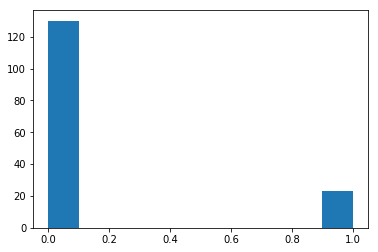

[0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [50]:
actual = y_test
predicted = [];
for p in range(0,len(prediction_results)):
#      print(np.reshape(prediction_results[p], (-1,1)))
    if len(predicted) == 0: 
        predicted = np.reshape(prediction_results[p], (-1,1))
        continue
    predicted = np.hstack((predicted, np.reshape(prediction_results[p], (-1,1))))
    
#print(predicted)

#print(getAccuracy(predicted,actual))
matched = getAccuracy(predicted,actual)
matches = getMatches(predicted,actual)
print(matches)
unique, counts = np.unique(matched, return_counts=True)
iTotal = len(actual)
iMatchN = 1
iAtleastN = iTotal - dict(zip(unique, counts))[iMatchN-1]

print ( "Union Accuracy: ", iAtleastN/iTotal*100. )

matched_count = getAccuracy(predicted, y_test)

plt.hist(matched_count)
plt.show()

print(matched_count)